In [1]:
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
ds = xr.open_dataset("NOAA_NCDC_ERSST_v3b_SST.nc", engine="netcdf4")
ds

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 684)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL
    source:       https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/...
    history:      extracted and cleaned by Ryan Abernathey for Research Compu...

Text(0, 0.5, 'Anomalies')

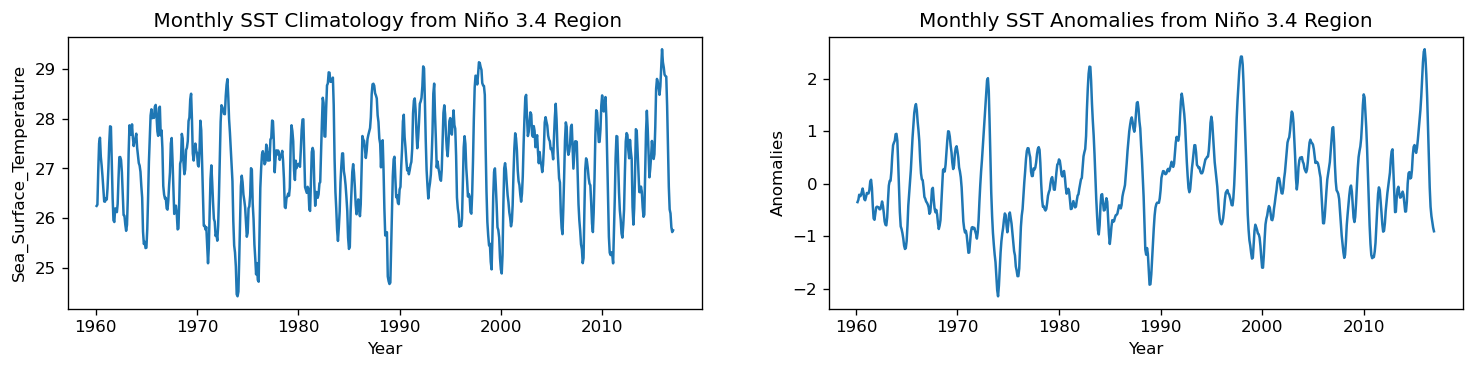

In [3]:
#1.1
#calculate
sst_clim = ds.sst.sel(lon=slice(190, 240), lat=slice(-5, 5)).groupby('time.month')
sst_anom =sst_clim - sst_clim .mean(dim='time')
sst_anom_rolling = sst_anom .rolling(time=3, center=True).mean()

#plot
#cite;https://blog.csdn.net/m0_46589710/article/details/105383077
time=pd.date_range(start='1960-01',periods=684,freq='m')

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,3), sharey=False, dpi=120)
ax1.plot(time,sst_clim.mean(dim=['lat','lon']))
ax2.plot(time,sst_anom_rolling.mean(dim=['lat','lon']))
ax1.set_title(' Monthly SST Climatology from Niño 3.4 Region'); ax2.set_title('Monthly SST Anomalies from Niño 3.4 Region')
ax1.set_xlabel('Year');  ax2.set_xlabel('Year')  
ax1.set_ylabel('Sea_Surface_Temperature');  ax2.set_ylabel('Anomalies')


([<matplotlib.axis.YTick at 0x24ed0605250>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

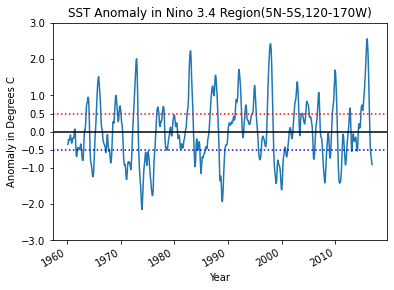

In [4]:
#1.2
sst_anom_rolling.mean(dim=['lat','lon']).plot()
#cite:https://www.cnblogs.com/shunguo/p/11398148.html
plt.axhline(y=0,ls="-",c="black")
plt.axhline(y=0.5,ls=":",c="red")
plt.axhline(y=-0.5,ls=":",c="blue")

plt.title('SST Anomaly in Nino 3.4 Region(5N-5S,120-170W)')  
plt.xlabel('Year')
plt.ylabel('Anomaly in Degrees C')

#cite:https://blog.csdn.net/weixin_38725737/article/details/82667461
plt.yticks([-3,-2,-1,-0.5,0,0.5,1,2,3])
